In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


%matplotlib inline

## Regression ##

In [41]:
homevalues = pd.read_csv("datafiles/single_family_home_values.csv")
homevalues.dropna(inplace = True)
X = homevalues[["bedrooms","bathrooms","rooms","squareFootage","lotSize", "yearBuilt", "priorSaleAmount"]]

In [42]:
y = homevalues.estimated_value

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
#linear Reg

lg = LinearRegression()

lg.fit(X_train, y_train)
lg.score(X_test,y_test) #r2

0.7321198319639541

In [45]:
#log Reg

homevalues["estimated_value_bins"] = homevalues.estimated_value.apply(lambda x: "High" if x > 700000 else "Moderate" if x > 450000 else "Low")

y2 = homevalues["estimated_value_bins"]

In [46]:
logreg = LogisticRegression()
X_train, X_test, y2_train, y2_test = train_test_split(X,y2)

logreg.fit(X_train, y2_train)
logreg.score(X_test, y2_test)

C:\Users\kndoa\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7736462093862816

In [47]:
y_pred = logreg.predict(X_test)
confusion_matrix(y2_test, y_pred )

array([[467,  13, 134],
       [  4, 857, 193],
       [ 79, 204, 819]], dtype=int64)

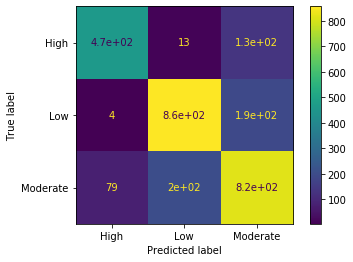

In [48]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(logreg, X_test, y2_test, values_format = None)

## Support Vector Machines ##

In [49]:
svr = SVR()

svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.04921718389008878

In [56]:
svc = SVC()

svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.672202166064982

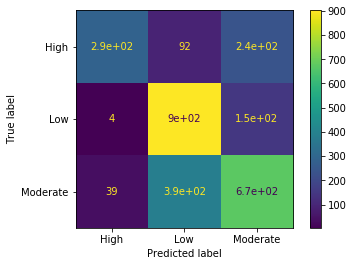

In [57]:
disp = plot_confusion_matrix(svc, X_test, y2_test, values_format = None)

## KNN

In [58]:
knn = KNeighborsRegressor()

In [59]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

-0.24111535899361813

In [62]:
knnClass = KNeighborsClassifier()

In [63]:
knnClass.fit(X_train, y2_train)
knnClass.score(X_test, y2_test)

0.7263537906137184

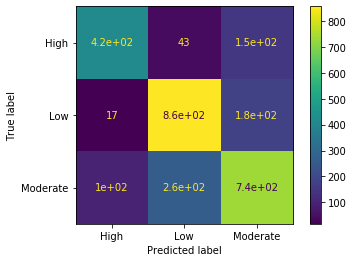

In [64]:
disp = plot_confusion_matrix(knnClass, X_test, y2_test, values_format = None)